# Réanalyse données images de la science

In [2]:
cd Data

/Users/emilien/Dropbox/Python pour les SHS/Formations/Formation-unil/Data


In [4]:
!pip install pyreadstat

In [1]:
import pyreadstat

In [4]:
data,meta = pyreadstat.read_sav("Data/fr.cdsp.ddi.sav")
data.shape

(1027, 188)

In [10]:
meta.column_names_to_labels

{'ident': 'Identifiant répondant',
 'poids1': 'Poids',
 'in06': 'Département',
 'regsof': 'Région de résidence (Régions Sofop)',
 'habp': "Catégorie d'agglomération",
 'rs1': 'Sexe du répondant',
 'rs2': 'Age du répondant',
 'age': 'Age du répondant (Recodage en 5 tranches)',
 'rs3': 'Situation professionnelle du répondant',
 'rs5': 'Statut professionnel du répondant',
 'rs6': 'PCS du répondant',
 'pcsip': 'Profession du répondant',
 'rs6b': 'Le répondant est/était enseignant',
 'rs7': 'Le répondant est le chef du ménage',
 'rs7b': 'Situation professionnelle du chef du ménage',
 'pcsp': 'Profession du chef du ménage',
 'rs9': 'PCS du chef du ménage',
 'rs9b': 'Le chef du ménage est/était enseignant (répondant exclu)',
 'rs69b': 'Le chef du ménage est/était enseignant (répondant inclu)',
 'q1_1': 'Confiance dans : La justice',
 'q1_2': 'Confiance dans : Les médias',
 'q1_3': 'Confiance dans : La police',
 'q1_4': "Confiance dans : L'Assemblée nationale",
 'q1_5': "Confiance dans : L'adm

In [21]:
meta.value_labels

{'labels0': {1.0: 'Ain',
  2.0: 'Aisne',
  3.0: 'Allier',
  7.0: 'Ardèche',
  9.0: 'Ariège',
  10.0: 'Aube',
  11.0: 'Aude',
  12.0: 'Aveyron',
  13.0: 'Bouches-du-Rhône',
  14.0: 'Calvados',
  15.0: 'Cantal',
  16.0: 'Charente',
  17.0: 'Charente-Maritime',
  18.0: 'Cher',
  19.0: 'Corrèze',
  21.0: "Côte-d'Or",
  22.0: "Côtes-d'Armor",
  23.0: 'Creuse',
  24.0: 'Dordogne',
  25.0: 'Doubs',
  26.0: 'Drôme',
  27.0: 'Eure',
  29.0: 'Finistère',
  30.0: 'Gard',
  31.0: 'Haute-Garonne',
  32.0: 'Gers',
  33.0: 'Gironde',
  34.0: 'Hérault',
  35.0: 'Ille-et-Vilaine',
  37.0: 'Indre-et-Loire',
  38.0: 'Isère',
  39.0: 'Jura',
  40.0: 'Landes',
  41.0: 'Loir-et-Cher',
  42.0: 'Loire',
  43.0: 'Haute-Loire',
  44.0: 'Loire-Atlantique',
  45.0: 'Loiret',
  47.0: 'Lot-et-Garonne',
  49.0: 'Maine-et-Loire',
  50.0: 'Manche',
  51.0: 'Marne',
  52.0: 'Haute-Marne',
  53.0: 'Mayenne',
  54.0: 'Meurthe-et-Moselle',
  55.0: 'Meuse',
  56.0: 'Morbihan',
  57.0: 'Moselle',
  58.0: 'Nièvre',
  59.0: '

In [5]:
def question(code,meta):
    return meta.column_names_to_labels[code]

def modalites(q,meta):
    return meta.value_labels[meta.variable_to_label[q]]

In [19]:
question("pcsip",meta)

'Profession du répondant'

In [23]:
modalites("pcsip",meta)

{1.0: 'Agriculteurs exploitants',
 2.0: "Artisans, Commercants et Chefs d'entreprises",
 3.0: 'Professions libérales et Cadres',
 4.0: 'Professions intermédiaires, Techniciens, Contremaitres et Ag',
 5.0: 'Employés et Personnels de services',
 6.0: 'Ouvriers',
 7.0: 'Retraités / Autres inactifs'}

Objectif de la recherche :

- 'q15': "Apport de la science à l'Homme"

Variables indépendantes :

-  'rs1': 'Sexe du répondant',
-  'rs2': 'Age du répondant',
-  'rs14': 'Revenus mensuels du foyer du répondant',
-  'q1_1': 'Confiance dans : La justice',
 'q1_2': 'Confiance dans : Les médias',
 'q1_3': 'Confiance dans : La police',
 'q1_4': "Confiance dans : L'Assemblée nationale",
 'q1_5': "Confiance dans : L'administration",
 'q1_6': 'Confiance dans : La science',
 'q1_7': 'Confiance dans : Les grandes entreprises',
 'q1_8': 'Confiance dans : Les associations',
 'q1_9': 'Confiance dans : Le Gouvernement',
 'q1_10': 'Confiance dans : Les agences gouvernementales'

## Explorer les données

In [7]:
import pandas as pd

### Recodage

In [8]:
nouvelles_modalites = modalites("q15",meta)
data["apportscience"] = data["q15"].replace(nouvelles_modalites)
data["sexe"] = data["rs1"].replace(modalites("rs1",meta))

# indicateur synthétique de confiance
questions = ["q1_{}".format(i) for i in range(1,11)]
dic = {1:1,2:1,3:0,4:0}
data["confiance_g"] = data[questions].replace(dic).fillna(0).sum(axis=1)/10

# confiance en quartiles
data["confiance_g_q"] = pd.qcut(data["confiance_g"],[0,0.25,0.5,0.75,1],["Q1","Q2","Q3",'Q4'])

In [36]:
data["apportscience"].value_counts()/len(data)

A peu près autant de bien que de mal    0.521908
Plus de bien que de mal                 0.400195
Plus de mal que de bien                 0.064265
Name: apportscience, dtype: float64

In [42]:
tableau = pd.DataFrame(data["apportscience"].value_counts())
tableau

,apportscience
A peu près autant de bien que de mal,536
Plus de bien que de mal,411
Plus de mal que de bien,66


In [44]:
tableau["%"] = tableau["apportscience"].apply(lambda x : round(100*x/len(data),2))

In [45]:
tableau

,apportscience,%
A peu près autant de bien que de mal,536,52.19
Plus de bien que de mal,411,40.02
Plus de mal que de bien,66,6.43


In [46]:
!pip install pyshs

In [47]:
import pyshs

In [49]:
pyshs.tri_a_plat(data,"apportscience")

,Effectif,Pourcentage (%)
A peu près autant de bien que de mal,536.0,52.9
Plus de bien que de mal,411.0,40.6
Plus de mal que de bien,66.0,6.5


In [54]:
tableau = pyshs.tri_a_plat(data,"sexe","poids1")
tableau

,Effectif redressé,Pourcentage (%)
sexe,,
Femme,538.1,52.4
Homme,488.9,47.6


In [57]:
tableau = pyshs.tri_a_plat(data,"apportscience","poids1")
tableau

,Effectif redressé,Pourcentage (%)
apportscience,,
A peu près autant de bien que de mal,531.7,52.5
Plus de bien que de mal,420.7,41.5
Plus de mal que de bien,60.4,6.0


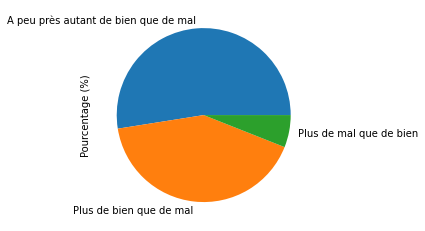

In [59]:
tableau["Pourcentage (%)"].plot(kind="pie")

### Construire un nouvel indicateur de confiance

Proportion de réponse Oui aux différentes dimensions de confiance (justice, science, etc...)

In [9]:
questions = ["q1_{}".format(i) for i in range(1,11)]

dic = {1:1,2:1,3:0,4:0}

data["confiance_g"] = data[questions].replace(dic).fillna(0).sum(axis=1)/10

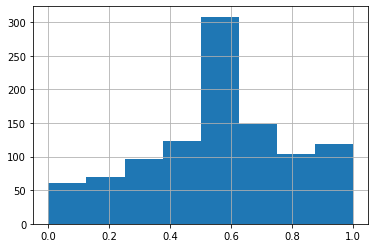

In [73]:
data["confiance_g"].hist(bins=8)

In [10]:
data["confiance_g_q"] = pd.qcut(data["confiance_g"],[0,0.25,0.5,0.75,1],["Q1","Q2","Q3",'Q4'])

In [89]:
data["age_reco"] = pd.cut(data["rs2"],[0,35,55,65,100],
       labels = ["[0-34]","[35-54]","[55-64]","[65-+]"])

In [91]:
modalites("rs14",meta)

{1.0: 'C - Moins de 500 euros (moins de 3300 francs)',
 2.0: 'E - De 500 à 800 euros (de 3301 à 5200 francs)',
 3.0: 'H - De 801 à 1200 euros (de 5201 à 8000 francs)',
 4.0: 'A - De 1201 à 1500 euros (de 8001 à 10 000 francs)',
 5.0: 'J - De 1501 à 2300 euros (de 10 001 à 15 000 francs)',
 6.0: 'L - De 2301 à 3000 euros (de 15 001 à 20000 francs)',
 7.0: 'K - De 3001 à 4500 euros (de 20001 à 30000 francs)',
 8.0: 'I - De 4501 à 7500 euros (de 30001 à 50000 francs)',
 9.0: 'G - Plus de 7500 euros (Plus de 50 000 francs)',
 888.0: 'Ne sait pas'}

In [93]:
dic = {1:"Moins de 1200",2:"Moins de 1200",3:"Moins de 1200",
       4:"De 1200 à 3000",5:"De 1200 à 3000",6:"De 1200 à 3000",
       7:"Plus de 3000",8:"Plus de 3000",9:"Plus de 3000"
      }

In [99]:
dic = {}
for i in range(1,10):
    if i <= 3:
        dic[i] = "Moins de 1200"
    elif i <=6:
        dic[i] = "De 1200 à 3000"
    else:
        dic[i] = "Plus de 3000"
dic

{1: 'Moins de 1200',
 2: 'Moins de 1200',
 3: 'Moins de 1200',
 4: 'De 1200 à 3000',
 5: 'De 1200 à 3000',
 6: 'De 1200 à 3000',
 7: 'Plus de 3000',
 8: 'Plus de 3000',
 9: 'Plus de 3000'}

In [95]:
data["revenus"] = data["rs14"].replace(dic)

## Analyse bivariée

In [109]:
tab,p = pyshs.tableau_croise(data,"sexe","apportscience","poids1",p=True)
print(p)
tab

0.008884109953621426


apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien,All
sexe,,,,
Femme,301.0 (57.1%),196.3 (37.2%),30.1 (5.7%),527.4
Homme,230.7 (47.5%),224.4 (46.2%),30.3 (6.2%),485.4
All,531.7,420.7,60.4,1012.8


In [105]:
pyshs.tableau_croise(data,"revenus","apportscience")

apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien,All
revenus,,,,
De 1200 à 3000,283 (56.9%),185 (37.2%),29 (5.8%),497
Moins de 1200,108 (60.7%),55 (30.9%),15 (8.4%),178
Plus de 3000,92 (41.8%),121 (55.0%),7 (3.2%),220
All,483,361,51,895


In [108]:
pyshs.tableau_croise(data,"confiance_g_q","apportscience")

apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien,All
confiance_g_q,,,,
Q1,214 (62.8%),92 (27.0%),35 (10.3%),341
Q2,161 (52.8%),124 (40.7%),20 (6.6%),305
Q3,61 (41.8%),79 (54.1%),6 (4.1%),146
Q4,100 (45.2%),116 (52.5%),5 (2.3%),221
All,536,411,66,1013


In [117]:
from scipy.stats import chi2_contingency

In [118]:
tableau = pd.crosstab(data["sexe"],data["apportscience"])
chi2,p,dof,ex_tableau = chi2_contingency(tableau)
print(p)

0.013889830526662587


In [116]:
ex_tableau

array([[277.25962488, 212.60019743,  34.14017769],
       [258.74037512, 198.39980257,  31.85982231]])

## Régression logistique binomiale sur l'attitude positive à l'apport de la science

Variable dépendante :

- apport positif à la science

Variables indépendantes :

- sexe
- revenus
- confiance en quartile

In [13]:
data["apportscienceB"] = data["apportscience"].apply(lambda x : 1 if x == "Plus de bien que de mal" else 0)

In [130]:
data["apportscienceB"] = data["apportscienceB"].fillna(0)

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
modele = smf.glm(formula="apportscienceB ~~ sexe",
                 data=data,family=sm.families.Binomial())

PatsyError: error tokenizing input (maybe an unclosed string?)
    apportscienceB ~~ sexe
                     ^